In [1]:
import pandas as pd
import numpy as np

### Loading data, dictionary and lists

In [2]:
df_1 = pd.read_csv('data/articles1.csv')
df_1

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [4]:
import pickle 

with open("lists/bow_corpus.txt", "rb") as fp:   # Unpickling
    bow_corpus = pickle.load(fp)
    
with open("lists/norm_corpus_bigrams.txt", "rb") as fp:   # Unpickling
    norm_corpus_bigrams = pickle.load(fp)
    
with open("lists/norm_papers.txt", "rb") as fp:   # Unpickling
    norm_papers = pickle.load(fp)
    
with open("lists/pre_papers.txt", "rb") as fp:   # Unpickling
    pre_papers = pickle.load(fp)
    
with open("lists/pre_titles.txt", "rb") as fp:   # Unpickling
    pre_titles = pickle.load(fp)

In [11]:
import nltk
import gensim

dictionary = gensim.corpora.Dictionary.load('models/dictionary.gensim')
coherence_df = pd.read_csv('models/gensim_scores/coherence_df.csv')

with open("models/gensim_scores/coherence_scores.txt", "rb") as fp:   # Unpickling
    coherence_scores = pickle.load(fp)


### Visualizing coherence scores of LDA models

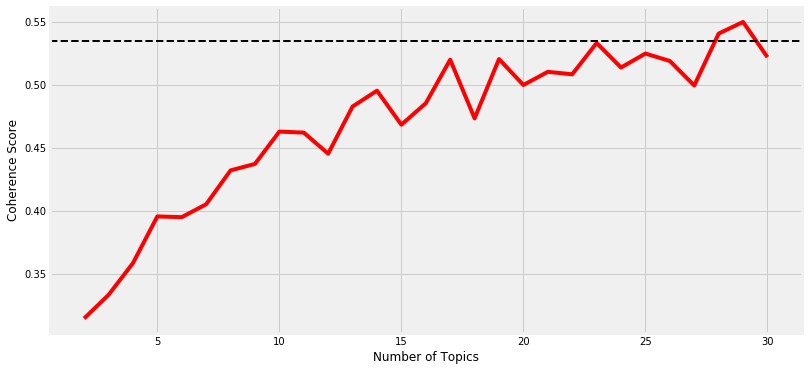

In [12]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c="r")
plt.axhline(y=0.535, c="k", linestyle="--", linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

### Selecting LDA Model

In [14]:
TOPICS = 30

load_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/model_'+str(TOPICS)+'.gensim')

In [15]:
topics = [[(term, round(wt, 3))
               for term, wt in load_lda_model.show_topic(n, topn=20)]
                   for n in range(0, load_lda_model.num_topics)]

pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, load_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"study, may, found, also, research, could, case, use, data, result, researcher, test, likely, new, system, risk, human, expert, used, according"
Topic2,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report"
Topic3,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become"
Topic4,"china, russia, country, iran, russian, north_korea, united_state, putin, chinese, would, official, international, military, government, deal, japan, ally, missile, world, also"
Topic5,"game, team, player, first, win, season, sport, two, final, play, second, time, year, three, point, ball, fan, football, week, back"
Topic6,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington"
Topic7,"business, company, million, money, tesla, job, market, year, would, economy, billion, government, bank, tax, trade, deal, worker, financial, fund, economic"
Topic8,"hernandez, brazil, rio, gold, athlete, venezuela, lee, olympic, corruption, olympics, brazilian, drug, former, charge, official, fifa, prison, world_cup, year, colombia"
Topic9,"woman, men, girl, female, sex, marriage, gay, male, young, sexual, also, transgender, gender, rape, man, sexual_assault, lgbt, bathroom, boy, body"
Topic10,"company, apple, google, facebook, new, product, customer, employee, business, sale, also, store, uber, user, service, like, according, amazon, technology, year"


In [16]:
tm_results = load_lda_model[bow_corpus]

corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

[(11, 0.4238178),
 (10, 0.45231712),
 (27, 0.1832193),
 (27, 0.1551969),
 (3, 0.6714785)]

In [17]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers

In [19]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(pre_papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

,Dominant Topic,Doc Count,% Total Docs,Topic Desc
0,1,833,1.67,"study, may, found, also, research, could, case, use, data, result, researcher, test, likely, new, system, risk, human, expert, used, according"
1,2,752,1.51,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report"
2,3,1224,2.45,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become"
3,4,1455,2.91,"china, russia, country, iran, russian, north_korea, united_state, putin, chinese, would, official, international, military, government, deal, japan, ally, missile, world, also"
4,5,1302,2.61,"game, team, player, first, win, season, sport, two, final, play, second, time, year, three, point, ball, fan, football, week, back"
5,6,5411,10.84,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington"
6,7,2055,4.12,"business, company, million, money, tesla, job, market, year, would, economy, billion, government, bank, tax, trade, deal, worker, financial, fund, economic"
7,8,117,0.23,"hernandez, brazil, rio, gold, athlete, venezuela, lee, olympic, corruption, olympics, brazilian, drug, former, charge, official, fifa, prison, world_cup, year, colombia"
8,9,228,0.46,"woman, men, girl, female, sex, marriage, gay, male, young, sexual, also, transgender, gender, rape, man, sexual_assault, lgbt, bathroom, boy, body"
9,10,2039,4.08,"company, apple, google, facebook, new, product, customer, employee, business, sale, also, store, uber, user, service, like, according, amazon, technology, year"


In [20]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
15285,15285,6,90.56,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington","Donald Trump Appoints Top Deputies, More White House Staff - Breitbart","donald trump has appointed former rnc chief of staff katie walsh to serve as his deputy chief of staff to the white house, according to a release from the transition team. [he also named rick de..."
15388,15388,2,88.90,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report",CBO Report: Ryan Plan Drops Number of Insured 24 million by 2026 - Breitbart,"the congressional budget office report states that 14 million people will lose insurance in 2018 under the ryan plan, while 24 million would lose insurance by 2026. [the congressional budget offic..."
26906,26906,19,87.21,"trump, republican, clinton, vote, campaign, candidate, voter, state, democrat, party, election, donald_trump, hillary_clinton, cruz, support, poll, gop, sander, win, debate",USA Today National Poll: Bernie Slightly Stronger Than Hillary Against GOP - Breitbart,a poll released wednesday by usa university shows that vermont socialist bernie sanders is stronger than hillary clinton when matched up against the four leading republican candidates. except fo...
45066,45066,10,86.84,"company, apple, google, facebook, new, product, customer, employee, business, sale, also, store, uber, user, service, like, according, amazon, technology, year",Sears is closing 72 stores — here’s the full list,"’’ ’sears is closing 72 more stores, in addition to . ’ ’the company released a list internally on tuesday of the closing stores, which includes 16 sears stores, 49 kmart stores, and seven auto ce..."
46411,46411,19,86.33,"trump, republican, clinton, vote, campaign, candidate, voter, state, democrat, party, election, donald_trump, hillary_clinton, cruz, support, poll, gop, sander, win, debate",Ted Cruz easily defeats Donald Trump in Wisconsin,”republican presidential candidate ted cruz just picked up a critical win in tuesday’s wisconsin primary.” ’multiple outlets projected soon after polls closed that cruz would defeat gop frontrunne...
...,...,...,...,...,...,...
6121,6121,27,10.09,"isi, military, force, attack, syria, war, group, killed, iraq, government, syrian, city, official, civilian, soldier, operation, army, fighting, troop, afghanistan","Clinton, Mosul, Pirate Party: Your Monday Briefing - The New York Times",good morning. we’re trying something new for our readers in asia and australia: a morning briefing to your day. what do you like? what do you want to see here? email us with your feedback at a...
4399,4399,20,9.81,"city, building, new_york, around, home, photo, park, place, street, first, day, time, image, hotel, two, like, house, work, dog, inside","Duterte, Mosul, Calais Jungle: Your Thursday Briefing - The New York Times",good morning. we’re trying something new for our readers in asia and australia: a morning briefing to your day. what do you like? what do you want to see here? email us with your feedback at a...
5205,5205,3,9.80,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become","Your Monday Briefing: Bernie Sanders, Dilma Rousseff, Ecuador - The New York Times","(want to get this briefing by email? here’s the .) good morning. here’s what you need to know: • who is the true new yorker? it’s the day before the new york primary, and bernie sanders, hillary..."
7769,7769,3,9.78,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become","‘Brexit,’ Angela Merkel, Donald Trump: Your Wednesday Briefing - The New York Times",good morning. here’s what you need to know: • b

In [21]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
Dominant Topic,,,,,,
1,24724,1,61.57,"study, may, found, also, research, could, case, use, data, result, researcher, test, likely, new, system, risk, human, expert, used, according",Two Cases Hint at Possible Sexual Transmission of Zika,"as global health experts scramble to understand how the zika virus spreads and may lead to birth defects, two cases suggest it may be transmitted through sex, not just mosquitoes. [in a conference..."
2,15388,2,88.90,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report",CBO Report: Ryan Plan Drops Number of Insured 24 million by 2026 - Breitbart,"the congressional budget office report states that 14 million people will lose insurance in 2018 under the ryan plan, while 24 million would lose insurance by 2026. [the congressional budget offic..."
3,574,3,58.98,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become",Geography Made America Great. Has Globalization Undone Its Influence? - The New York Times,"earning the rockies how geography shapes america’s role in the world by robert d. kaplan 201 pp. random house. $27. well over half of american voters, having cast ballots for hillary clinton or ..."
4,38433,4,80.01,"china, russia, country, iran, russian, north_korea, united_state, putin, chinese, would, official, international, military, government, deal, japan, ally, missile, world, also","North Korean missile launch fails, US says","(cnn) us strategic command systems detected a failed north korean ballistic missile launch saturday evening near the northwestern city of kusong, the pentagon said. ”we strongly condemn this and ..."
5,880,5,86.16,"game, team, player, first, win, season, sport, two, final, play, second, time, year, three, point, ball, fan, football, week, back",Falcons’ Matt Ryan Is Named M.V.P. of N.F.L. - The New York Times,"houston — atlanta falcons quarterback matt ryan was named the n. f. l. ’s most valuable player on saturday, 24 hours before he was to try to cap his superb season with super bowl glory. ryan, 3..."
6,15285,6,90.56,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington","Donald Trump Appoints Top Deputies, More White House Staff - Breitbart","donald trump has appointed former rnc chief of staff katie walsh to serve as his deputy chief of staff to the white house, according to a release from the transition team. [he also named rick de..."
7,47758,7,75.86,"business, company, million, money, tesla, job, market, year, would, economy, billion, government, bank, tax, trade, deal, worker, financial, fund, economic",Goldman Sachs is getting back into the corporate buyout game,"’ ’ ’ goldman sachs group is raising a new corporate buyout fund of between $5 billion and $8 billion — its first since the financial crisis. ’ ’ the new fund, dubbed ” ’ ” the new f..."
8,24663,8,54.85,"hernandez, brazil, rio, gold, athlete, venezuela, lee, olympic, corruption, olympics, brazilian, drug, former, charge, official, fifa, prison, world_cup, year, colombia",Again: Obama Commutes 57 More Drug Offender Sentences - Breitbart,"president obama granted the commutation of 57 more drug offenders today, adding to the historic high number of commuted sentences as president. [the drug offenders are currently serving prison tim..."
9,42077,9,41.67,"woman, men, girl, female, sex, marriage, gay, male, young, sexual, also, transgender, gender, rape, man, sexual_assault, lgbt, bathroom, boy, body",Jenner’s journey: From Bruce to Caitlyn,"see photos from the life and career of caitlyn jenner, the olympian turned reality tv star and transgender advocate."


### Visuaslizing topics with pyLDAvis

In [ ]:
import pyLDAvis.gensim

load_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/model_25.gensim')

lda_display = pyLDAvis.gensim.prepare(load_lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)